# **Preparing Dataset**
## **Load Dataset**

In [1]:
from google.colab import drive
import zipfile
import os

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/Capstone/potato-dataset-fix.zip'

Mounted at /content/drive


In [ ]:
# Extract zip file
! unzip "/content/drive/MyDrive/Capstone/potato-dataset-fix.zip" -d .

## **Classes**

In [4]:
potato_data = "/content/potato-dataset-fix"
potato_classes = os.listdir(potato_data)

In [5]:
print("\nPotato Classes:")
for classes in potato_classes:
    if os.path.isdir(os.path.join(potato_data, classes)):
        print(classes)


Potato Classes:
potato_late_blight
non_potato
potato_healthy
potato_early_blight


## **Preview Image Dataset**

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


potato_late_blight
Total Images: 1000
Resolution of First Image: (256, 256, 3)


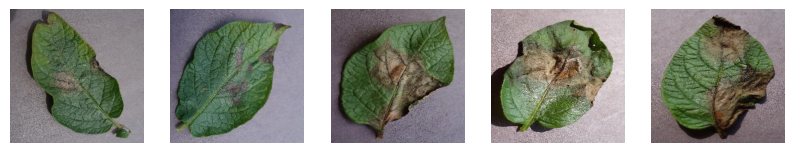


non_potato
Total Images: 1000
Resolution of First Image: (256, 384, 3)


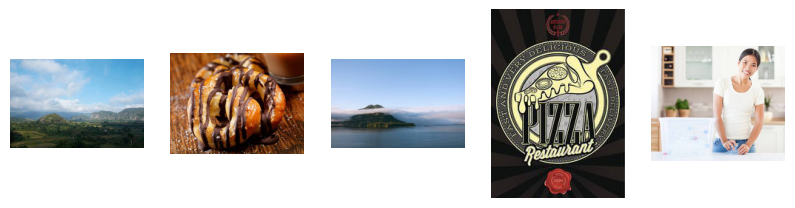


potato_healthy
Total Images: 1000
Resolution of First Image: (256, 256, 3)


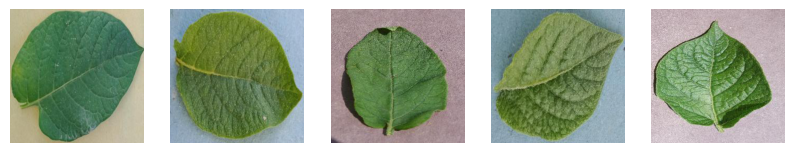


potato_early_blight
Total Images: 1000
Resolution of First Image: (256, 256, 3)


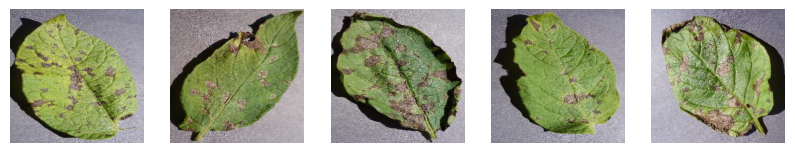

In [7]:
for item in potato_classes:
  print("")
  print(item)
  class_dir = os.path.join(potato_data, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)
  
  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Show Image
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# **Preprocessing Data**
## Resize Ukuran Gambar

In [8]:
import cv2
import shutil

In [9]:
# Resize resolusi/ukuran gambar data "non_potato"
non_potato_dir = os.path.join(potato_data, "non_potato")
non_potato_images = os.listdir(non_potato_dir)

for img_path in non_potato_images:
    img = cv2.imread(os.path.join(non_potato_dir, img_path))
    resized_img = cv2.resize(img, (256, 256))
    cv2.imwrite(os.path.join(non_potato_dir, img_path), resized_img)

non_potato
Jumlah gambar: 1000
Resolusi/Ukuran gambar pertama: (256, 256, 3)


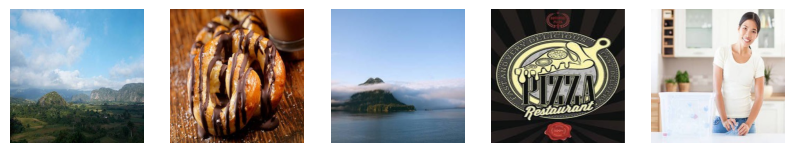

In [10]:
print("non_potato")
num_images = len(non_potato_images)
print("Jumlah gambar:", num_images)

# Menampilkan resolusi/ukuran gambar pertama dalam kelas
img_path = os.path.join(non_potato_dir, non_potato_images[0])
img = mpimg.imread(img_path)
image_shape = img.shape
print("Resolusi/Ukuran gambar pertama:", image_shape)

# Menampilkan beberapa contoh gambar
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(non_potato_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(non_potato_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [11]:
# Save data "non_potato" setelah resize
output_dir = "/content/potato-dataset-fix/non_potato_clean"
os.makedirs(output_dir, exist_ok=True)

non_potato_dir = os.path.join(potato_data, "non_potato")
non_potato_images = os.listdir(non_potato_dir)

for img_path in non_potato_images:
    img = cv2.imread(os.path.join(non_potato_dir, img_path))
    resized_img = cv2.resize(img, (256, 256))
    output_path = os.path.join(output_dir, img_path)
    cv2.imwrite(output_path, resized_img)

In [12]:
potato_data_new = "/content/potato-dataset-fix"
potato_classes = os.listdir(potato_data_new)

# Mengecualikan folder "non_potato" dari potato_classes
if "non_potato" in potato_classes:
    potato_classes.remove("non_potato")

print("Potato Classes:")
for potato_class in potato_classes:
    if os.path.isdir(os.path.join(potato_data_new, potato_class)):
        print(potato_class)

Potato Classes:
potato_late_blight
non_potato_clean
potato_healthy
potato_early_blight



potato_late_blight
Total Images: 1000
Resolution of First Image: (256, 256, 3)


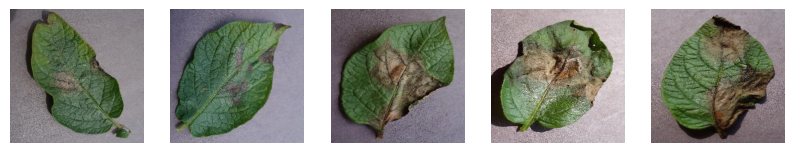


non_potato
Total Images: 1000
Resolution of First Image: (256, 256, 3)


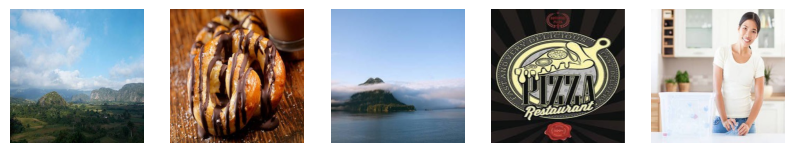


potato_healthy
Total Images: 1000
Resolution of First Image: (256, 256, 3)


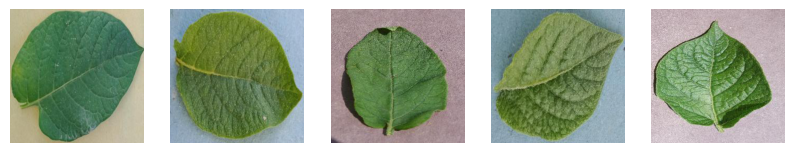


potato_early_blight
Total Images: 1000
Resolution of First Image: (256, 256, 3)


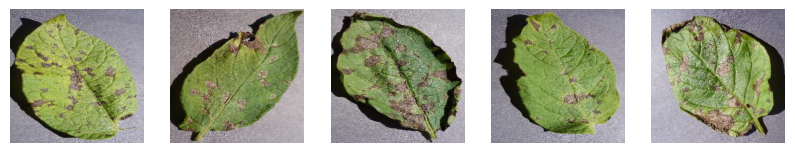

In [ ]:
# for item in potato_classes:
#   print("")
#   print(item)
#   class_dir = os.path.join(potato_data_new, item)
#   class_images = os.listdir(class_dir)

#   # Total images in each classes
#   num_images = len(class_images)
#   print("Total Images:", num_images)
  
#   # Resolution/size of each first image in class
#   img_path = os.path.join(class_dir, class_images[0])
#   img = mpimg.imread(img_path)
#   image_shape = img.shape
#   print("Resolution of First Image:", image_shape)

#   # Show Image
#   plt.figure(figsize=(10, 5))
#   for i, img_path in enumerate(class_images[:5]):
#     sp = plt.subplot(1, 5, i+1)
#     img = mpimg.imread(os.path.join(class_dir, img_path))
#     plt.axis('off')
#     plt.imshow(img)
#   plt.show()

## **Rename The Image File**

In [13]:
import os

In [14]:
for potato_class in potato_classes:
  class_dir = os.path.join(potato_data_new, potato_class)
  if os.path.isdir(class_dir):
    file_list = os.listdir(class_dir)
    for i, file_name in enumerate(file_list):
      file_path = os.path.join(class_dir, file_name)
      new_file_name = f"{potato_class}_{i+1}.jpg"
      new_file_path = os.path.join(class_dir, new_file_name)
      os.rename(file_path, new_file_path)

## **Save Final Dataset**

In [15]:
import zipfile

In [16]:
# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Nama direktori yang akan di-zip
source_dir = "/content/potato-dataset-fix"

# Nama file zip yang akan dibuat
zip_file_name = "potato-data-final.zip"

# Buat objek zip baru
zip_file = zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED)

# Rekursif menambahkan file ke dalam zip
for folder_name, subfolders, filenames in os.walk(source_dir):
    if os.path.basename(folder_name) != "non_potato":
         for filename in filenames:
            file_path = os.path.join(folder_name, filename)
            # Tambahkan file ke dalam zip dengan struktur direktori yang sama
            zip_file.write(file_path, os.path.relpath(file_path, source_dir))

# Tutup zip file setelah selesai
zip_file.close()

print("Dataset succesfully zipped to:", zip_file_name)

Mounted at /content/drive
Dataset succesfully zipped to: potato-data-final.zip


# **Bulding Model**
## **Importing New Dataset**

In [20]:
from google.colab import drive
import zipfile
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Extract zip file
! unzip "/content/drive/MyDrive/Capstone/potato-data-final.zip" -d .

zip_file_path = '/content/drive/MyDrive/Capstone/potato-data-final.zip'
target_folder = '/content/potato-finaldata'  # Path ke folder tujuan

# Extract file zip ke folder tujuan
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(target_folder)

## **Splitting Train and Test**

In [23]:
data_dir = '/content/potato-finaldata'
img_dim = 256
img_shape = (256, 256, 3)

In [24]:
#Augmentasi Data
datagen = ImageDataGenerator(
    rescale=1./256.,
    validation_split=0.15,
    rotation_range=20,  # Rotasi gambar hingga 20 derajat
    width_shift_range=0.2,  # Pergeseran horizontal gambar sebesar 0.2
    height_shift_range=0.2,  # Pergeseran vertikal gambar sebesar 0.2
    shear_range=0.2,  # Peregangan gambar sebesar 0.2
    zoom_range=0.2,  # Perbesaran gambar sebesar 0.2
    horizontal_flip=True,  # Pembalikan horizontal gambar
    vertical_flip=True  # Pembalikan vertikal gambar 
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size =(img_dim, img_dim),
    batch_size = 100,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size = (img_dim,img_dim),
    batch_size = 25,
    class_mode = 'categorical',
    subset='validation',
    shuffle=False
)

Found 3400 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [25]:
train_generator.class_indices

{'non_potato_clean': 0,
 'potato_early_blight': 1,
 'potato_healthy': 2,
 'potato_late_blight': 3}

In [26]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)
num_labels = len(labels)

print("Labels: {}".format(labels))
print("Num labels: {}".format(num_labels))

Labels: ['non_potato_clean', 'potato_early_blight', 'potato_healthy', 'potato_late_blight']
Num labels: 4


## **Building Baseline Model**

In [27]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00


In [28]:
# tensorflow utils
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

In [29]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [30]:
# Compile Model
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [31]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

In [32]:
# fitting model
history1 = model1.fit(
    train_generator,
    epochs = 50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
34/34 [==============================] - 506s 15s/step - loss: 1.1149 - accuracy: 0.4529 - val_loss: 0.7805 - val_accuracy: 0.6133
Epoch 2/50
34/34 [==============================] - 475s 14s/step - loss: 0.5975 - accuracy: 0.7612 - val_loss: 0.4770 - val_accuracy: 0.8050
Epoch 3/50
34/34 [==============================] - 473s 14s/step - loss: 0.4308 - accuracy: 0.8397 - val_loss: 0.3246 - val_accuracy: 0.8617
Epoch 4/50
34/34 [==============================] - 493s 15s/step - loss: 0.3517 - accuracy: 0.8582 - val_loss: 0.3054 - val_accuracy: 0.8950
Epoch 5/50
34/34 [==============================] - 478s 14s/step - loss: 0.2421 - accuracy: 0.9171 - val_loss: 0.1740 - val_accuracy: 0.9383
Epoch 6/50
34/34 [==============================] - 474s 14s/step - loss: 0.1928 - accuracy: 0.9332 - val_loss: 0.1531 - val_accuracy: 0.9433
Epoch 7/50
34/34 [==============================] - 489s 14s/step - loss: 0.2092 - accuracy: 0.9259 - val_loss: 0.1666 - val_accuracy: 0.9450
Epoch 

In [39]:
# Evaluate the Model
test_loss, test_accuracy = model1.evaluate(validation_generator, steps=len(validation_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

24/24 [==============================] - 35s 1s/step - loss: 0.0680 - accuracy: 0.9817
Test Loss: 0.06803879886865616
Test Accuracy: 0.9816666841506958


## **Visualization of Accuracy and Loss & Confusion Matrix**

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

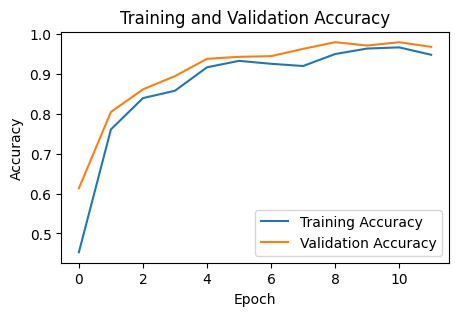

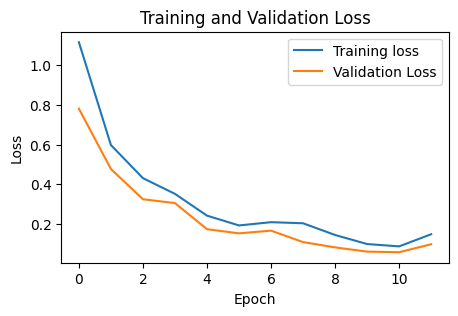

In [42]:
# Accuracy Plot
plt.figure(figsize=(5, 3))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(5, 3))
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
# # define confusion matrix method
# def conf_matrix(y_test, y_pred):
#   cf_matrix = confusion_matrix(y_test, y_pred)

#   ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

#   ax.set_title('Confusion Matrix with labels\n');
#   ax.set_xlabel('\nPredicted Values')
#   ax.set_ylabel('Actual Values ');

#   ax.xaxis.set_ticklabels(name_classes, rotation=45)
#   ax.yaxis.set_ticklabels(name_classes, rotation=45)

#   plt.show()

# y_test = validation_generator.classes
# y_pred = model1.predict_generator(validation_generator)
# y_pred = tf.argmax(y_pred, axis=1)
# conf_matrix(y_test, y_pred)

## **Testing Prediction**

In [59]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

Saving 921.jpg to 921.jpg
1/1 [==============================] - 0s 65ms/step


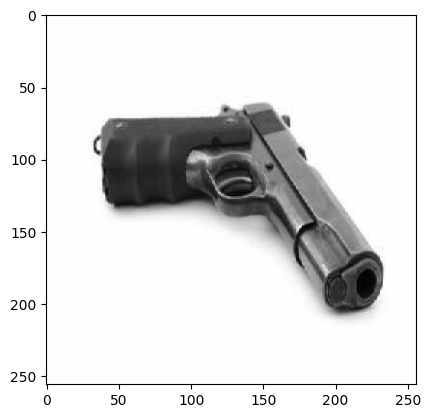

Class Predictions:
non_potato_clean: 100.00%
potato_early_blight: 0.00%
potato_healthy: 0.00%
potato_late_blight: 0.00%

Highest Prediction: non_potato_clean: 100.00%


In [62]:
labels = list(train_generator.class_indices.keys())
upload = files.upload()

for fn in upload.keys():
    # Image Prediction
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    predictions = model1.predict(images)[0]
    
    plt.imshow(img)
    plt.show()
    
    # Finding the class with the highest percentage
    max_index = np.argmax(predictions)
    max_label = labels[max_index]
    max_percentage = predictions[max_index] * 100
    
    print("Class Predictions:")
    for label, percentage in zip(labels, predictions * 100):
        print("{}: {:.2f}%".format(label, percentage))
    print("\nHighest Prediction: {}: {:.2f}%".format(max_label, max_percentage))

# **Saving Model**

In [66]:
# Menyimpan model akhir
model1.save("potato_model_1.h5")
tf.keras.models.save_model(model1, 'potato_model_1.hdf5')

In [67]:
#Convert TF Lite
import tensorflow as tf

#Load model yang telah disimpan
last_model = tf.keras.models.load_model(filepath="potato_model_1.h5")

#Convert model ke bentuk TF Lite
converter = tf.lite.TFLiteConverter.from_keras_model(last_model)
model_tflite = converter.convert()

#Simpan TF Lite model.
with tf.io.gfile.GFile('potato_model_1.tflite', 'wb') as f:
  f.write(model_tflite)

In [70]:
# Menyimpan dalam bentuk JSON
model1_json = model1.to_json()
with open("model_tl_json", "w") as file_json:
    file_json.write(model1_json)